# Generate all trees

Of either a given height, or with a given numbrer of elements.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Toolbox
def to_bin(x, n_pos=None):
    out = []
    k = x
    while k>0:
        out = [(k % 2)] + out
        k //= 2
    if n_pos is not None:
        out = [0]*(n_pos-len(out)) + out
    return out

for i in range(2**4):
    print(''.join([str(x) for x in to_bin(i,4)]), end=' ')

0000 0001 0010 0011 0100 0101 0110 0111 1000 1001 1010 1011 1100 1101 1110 1111 

In [6]:
# All binary trees of a given height

def rarify(nums):
    for i in range(len(nums)-1,0,-1):
        kids = [i*2, i*2+1]
        for kid in kids:
            if kid<len(nums) and nums[i]==0:
                nums[kid] = 0
    return nums

def tree_height(nums, pos=None):
    if pos is None: return tree_height(nums, 1)
    if pos>=len(nums): return 0
    if nums[pos]==0: return 0
    return 1+max(tree_height(nums, 2*pos), tree_height(nums, 2*pos+1))

def to_string(nums):
    return ''.join([str(a) for a in nums])
        
def all_bst_h(height):
    """All binary trees of given height."""
    out = []
    arr_len = 2**(height)-1
    for i in range(2**arr_len):
        x = [0] + to_bin(i, arr_len)
        x = rarify(x)
        if tree_height(x)==height and to_string(x[1:]) not in out:            
            out.append(to_string(x[1:]))
    return out
    
print(rarify([0,1,1,0]))
print(tree_height([0,1,1,0]))
print(all_bst_h(3))

[0, 1, 1, 0]
2
['1010001', '1010010', '1010011', '1100100', '1101000', '1101100', '1110001', '1110010', '1110011', '1110100', '1110101', '1110110', '1110111', '1111000', '1111001', '1111010', '1111011', '1111100', '1111101', '1111110', '1111111']


In [7]:
# Now trying all trees of N elements
# First brute-force approach (doesn't work for n>5)

def ones_in_zeros(k,n):
    """K ones in n digits total"""
    mem = {}
    def helper(k,n,mem):
        if (k,n) in mem: return mem[(k,n)]
        if k==n:   out = [[1]*n]
        elif n==0: out = [[]]
        elif k==0: out =  [[0]*n]
        else: 
            out = [[a]+b for a in [0,1] for b in helper(k-a, n-1, mem)]
        mem[(k,n)] = tuple(out)
        return out
    return helper(k,n,mem)

ones_in_zeros(2,4)

def all_bst_n_brute(n):
    """All binary trees with given number of nodes, brute-force."""
    seq = ones_in_zeros(n,2**n-1)
    out = []
    for tree in seq:
        x = rarify([0] + tree)
        if sum(x)==n and to_string(x[1:]) not in out:
            out.append(to_string(x[1:]))
    return out
    
print(all_bst_n_brute(4))
len(all_bst_n_brute(4))

['101000100000001', '101000100000010', '101001000000100', '101001000001000', '101001100000000', '110010000010000', '110010000100000', '110100001000000', '110100010000000', '110110000000000', '111000100000000', '111001000000000', '111010000000000', '111100000000000']


14

In [8]:
def mix(x,y):
    """Shuffles two tree-coding arrays together"""
    n = int(np.log(len(x)+1)/np.log(2))
    print(n)
    out = []
    j = 0
    width = 1
    for lev in range(n):
        out = out + x[j:(j+width)] + y[j:(j+width)]
        j += width
        width *= 2
    return out
        
print(mix([1,2,3],[4,5,6]))
print(mix([0, 1, 4, 2, 3, 5, 6],[100,101,104,102,103,105,106]))

2
[1, 4, 2, 3, 5, 6]
3
[0, 100, 1, 4, 101, 104, 2, 3, 5, 6, 102, 103, 105, 106]


In [22]:
# Now let's try an optimized approach

def to_string(nums):
    return ''.join([str(a) for a in nums])

def all_bst_n(n):
    """All binary trees with n nodes, dynamic programming"""
    mem = {}
    
    def mix(x,y):
        """Shuffles two tree-coding arrays together"""
        n = int(np.log(len(x)+1)/np.log(2))
        out = []
        j = 0
        width = 1
        for lev in range(n):
            out = out + x[j:(j+width)] + y[j:(j+width)]
            j += width
            width *= 2
        return out    
    
    def bst(l, n, mem):
        """Recursive helper function, placing n nodes in l levels"""
        if (l,n) in mem: return mem[(l,n)]
        if n==0:         out = [[0]*(2**l-1)]
        elif n==1:       out = [[1]+[0]*(2**l-2)]
        else:
            out = []
            for k in range(n): # To range(n) if you want both wings, to (n-1) for one side only
                # print('k:', n, k, n-1-k)
                set1 = bst(l-1, n-1-k, mem)
                set2 = bst(l-1, k, mem)
                for x in set1:
                    for y in set2:
                        out += [[1] + mix(x,y)]
        mem[(l,n)] = tuple(out)
        # print(l,n, tuple(out))
        return tuple(out)
    return [to_string(a) for a in bst(n, n, mem)]

#print(all_bst_n_brute(4))
print(all_bst_n(4))

['110100010000000', '110100001000000', '110110000000000', '110010000100000', '110010000010000', '111100000000000', '111010000000000', '111001000000000', '111000100000000', '101001000001000', '101001000000100', '101001100000000', '101000100000010', '101000100000001']


Below I tried to find a way to sort through all trees and only leave those that are not isometric to each other up to branch rotation. But my approach doesn't really work.

What I do below is to look at height of all leaves in a tree, which is a strictly stronger condition. For small trees (n=4 or 5) it works well, but for larger trees it prunes things that shouldn't be pruned. For example a tree with 4 leaves height 4,3,2,2 is not rotationally isomorphic to a tree that has same branches cut and reattached as 4,2,3,2. But my program below will claim that they are isomorphic. Even though no rotation can turn one into the other (4322=2243==2234, but not 2324).

Presumably, this approach below can be fixed if we replace `sorted()` in the `invariant()` function with some special sort that only swaps branches tha can be swapped... But for this to work we need to remember more information... So it's tricky. I'm not sure how to solve it.

In [37]:
# Attempts to prune isomorphic trees
def invariant(tree):
    """Calculates a hash for rotation invariance"""
    def leaf(t, i=1, h=0):
        """Recursively look for leaves."""
        if t[i]=='0': return []
        if i*2+1>len(t): return [h]
        a1 = leaf(t, 2*i, h+1)
        a2 = leaf(t, 2*i+1, h+1)
        if a1 or a2: return a1+a2
        else: return [h]
    return tuple(sorted(leaf('0'+tree)))

def prune(seq):
    out = {}
    for t in seq:
        inv = invariant(t)
        if inv not in out:
            out[inv] = t
    return [val for key,val in out.items()]

seq = all_bst_n(4)
seq = prune(seq)
for t in seq:
    print(t,invariant(t))

110100010000000 (3,)
110110000000000 (2, 2)
111100000000000 (1, 2)


A total of 429 trees
.............................................................................................................................................................................................................................................................................................................................................................................................................................................

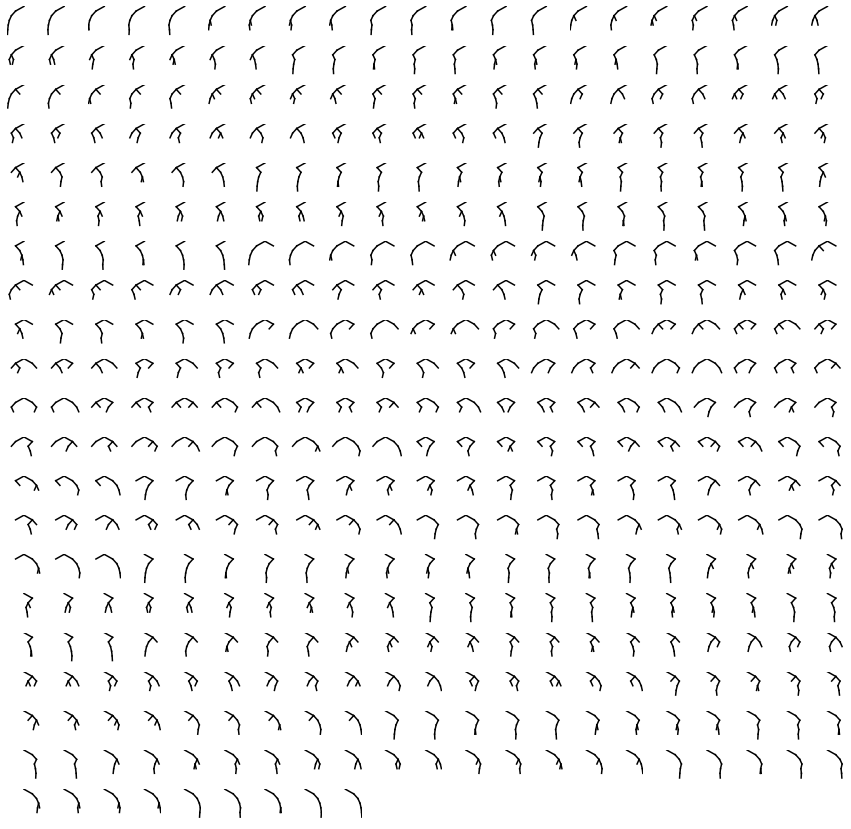

In [44]:
def vis_tree(ax, code):
    depth = int(np.log(len(code)+1)/np.log(2))
    plt.ylim(0, depth)
    plt.xlim(-0.5, 0.5)
    level = 0
    width = 1
    j = 0
    x = [0] + [0 if s=='0' else 1 for s in code]
    for i in range(1,len(x)):
        if x[i]==1:
            #ax.plot((j-(width-1)/2)/width, depth-level,'.k')
            if x[i // 2]==1:
                ax.plot([(j-(width-1)/2)/width, (j//2-(width//2-1)/2)/(width//2)], [depth-level, depth-level+1], 'k-')
        else:
            pass
            #ax.plot((j-(width-1)/2)/width, depth-level,'.',color='red')
        j += 1
        if j>=width:
            j = 0
            width *= 2
            level += 1

seq = all_bst_n(7) # Don't do more than 7 for full, more than 12 for pruned (rotationally non-invariant)
# seq = prune(seq) # Doesn't work right now (see above)
print(f"A total of {len(seq)} trees")
n_subplots = int(np.sqrt(len(seq)))+1
fig = plt.figure(figsize=(15,15))
# fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
for i in range(len(seq)):
    print('.', end='')
    x = seq[i]
    ax = plt.subplot(n_subplots, n_subplots, i+1)
    vis_tree(ax, x)
    ax.axis('off')